In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [25]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-25-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [26]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [27]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import scipy.stats as stats

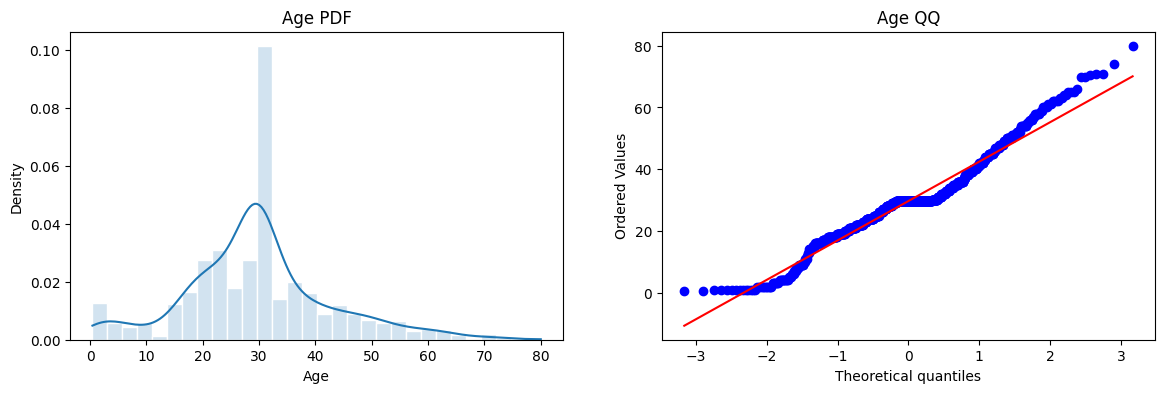

In [30]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(df['Age'], kde=True, stat='density', alpha=.2, edgecolor=(1, 1, 1, 1))
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age'], plot=plt)
plt.title('Age QQ')
plt.show()

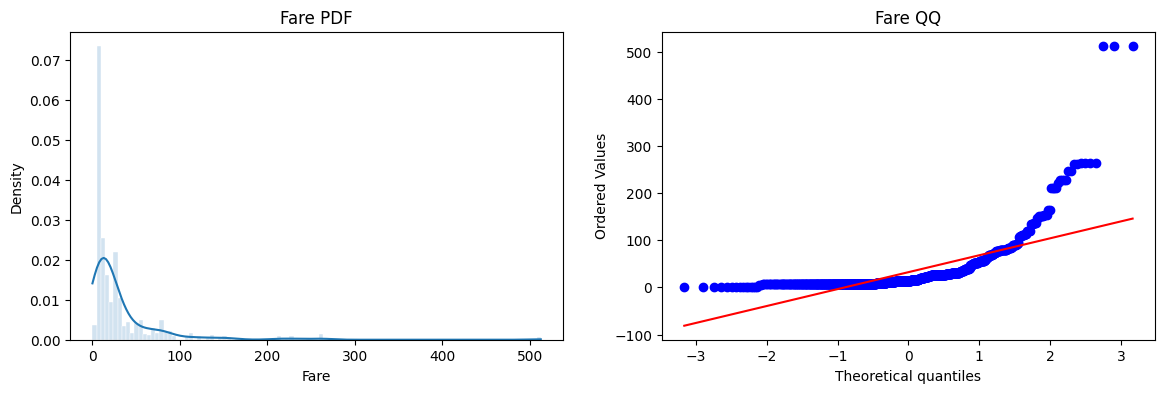

In [31]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(df['Fare'], kde=True, stat='density',alpha=.2, edgecolor=(1, 1, 1, 1))
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(df['Fare'], plot=plt)
plt.title('Fare QQ')
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)
accuracy_score(y_test, y_pred)

0.6480446927374302

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.6927374301675978

In [35]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer

In [36]:
ft = FunctionTransformer(np.log1p)

In [37]:
X_train_trans = ft.fit_transform(X_train)
X_test_trans = ft.transform(X_test)

In [38]:
lor = LogisticRegression()
lor.fit(X_train_trans, y_train)
y_pred = lor.predict(X_test_trans)
accuracy_score(y_test, y_pred)

0.6815642458100558

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train_trans, y_train)
y_pred = dt.predict(X_test_trans)
accuracy_score(y_test, y_pred)

0.6871508379888268

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
X_trans = ft.fit_transform(X)

np.mean(cross_val_score(lor, X_trans, y, cv=10))

0.678027465667915

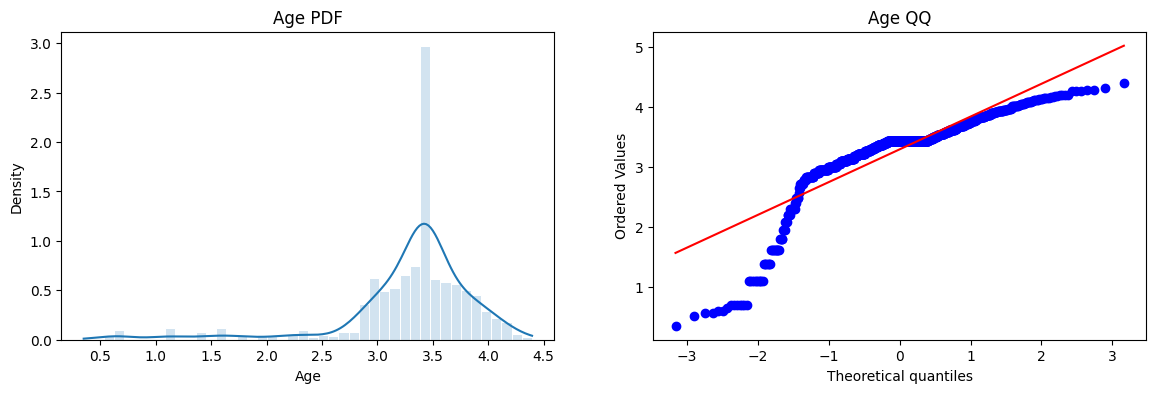

In [42]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_trans['Age'], kde=True, stat='density', alpha=.2, edgecolor=(1, 1, 1, 1))
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_trans['Age'], plot=plt)
plt.title('Age QQ')
plt.show()

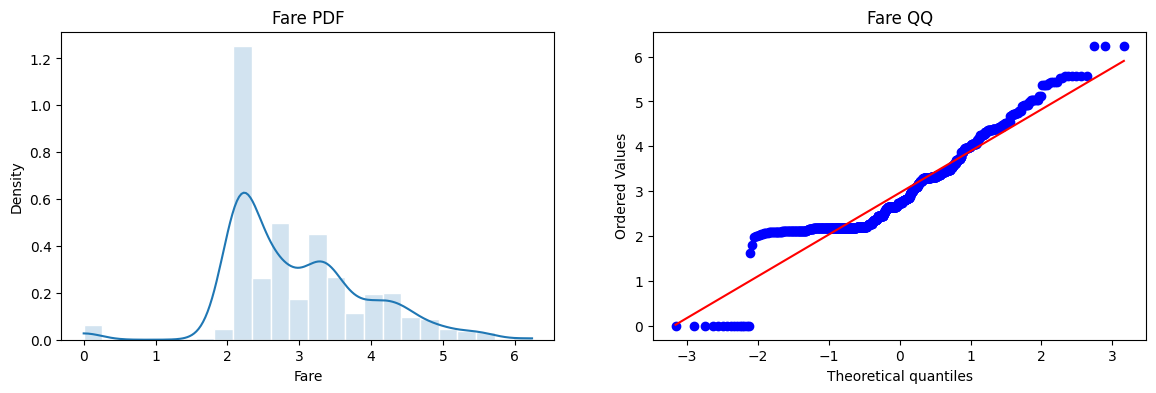

In [43]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_trans['Fare'], kde=True, stat='density',alpha=.2, edgecolor=(1, 1, 1, 1))
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_trans['Fare'], plot=plt)
plt.title('Fare QQ')
plt.show()

In [50]:
from sklearn.compose import ColumnTransformer

In [51]:
# df['Age_log'] = df['Age'].apply(lambda x: np.log1p(x)) #another way
# df['Fare_log'] = np.log1p(df['Fare']) #another way

ft2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

In [52]:
X_train_trans = ft2.fit_transform(X_train)
X_test_trans = ft2.transform(X_test)

In [53]:
lor = LogisticRegression()
lor.fit(X_train_trans, y_train)
y_pred = lor.predict(X_test_trans)
accuracy_score(y_test, y_pred)

0.6703910614525139

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train_trans, y_train)
y_pred = dt.predict(X_test_trans)
accuracy_score(y_test, y_pred)

0.659217877094972

In [55]:
X_trans = ft2.fit_transform(X)

np.mean(cross_val_score(lor, X_trans, y, cv=10))

0.6712609238451936

In [109]:
def apply_transform(transform):
  X = df.iloc[:, 1:3]
  y = df.iloc[:, 0]

  ft = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

  X_trans = ft.fit_transform(X)


  print(np.mean(cross_val_score(lor, X_trans, y, cv=10)))

  plt.figure(figsize=(14, 4))
  plt.subplot(121)
  stats.probplot(X['Fare'], plot=plt)
  plt.title('Fare QQ')

  plt.subplot(122)
  stats.probplot(X_trans[:, 0], plot=plt)
  plt.title('Fare QQ')
  plt.show()

0.6712609238451936


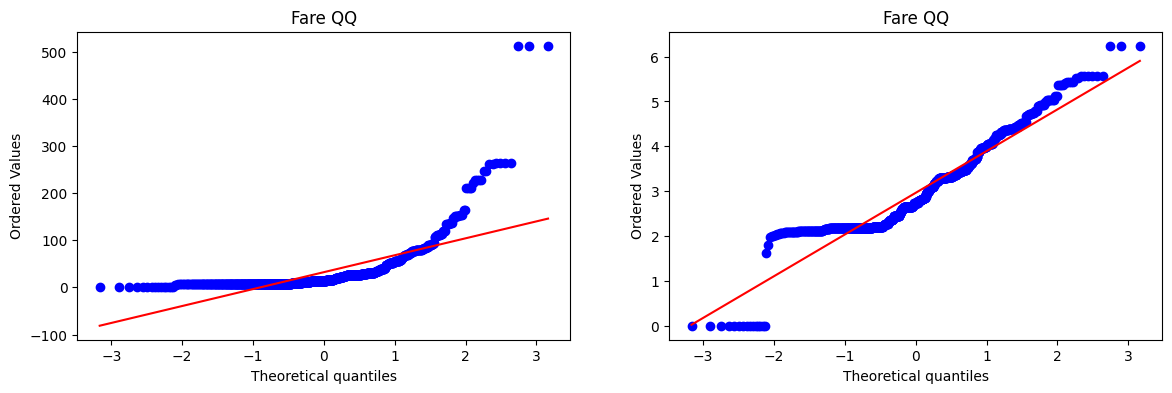

In [110]:
# apply_transform(lambda x: 1/(x+.0000000000001))  #Reciprocal
# apply_transform(lambda x: (x-x.mean())/x.std())  #Standardization
# apply_transform(lambda x: (x-x.min())/(x.max()-x.min()))
# apply_transform(lambda x: (x-x.median())/x.quantile(0.75)- (x.quantile(0.25)-x.median()))
apply_transform(lambda x: np.log1p(x))